<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Team-Season-Level" data-toc-modified-id="Team-Season-Level-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Team-Season Level</a></span><ul class="toc-item"><li><span><a href="#Setup" data-toc-modified-id="Setup-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Setup</a></span></li><li><span><a href="#Computing-the-Factors" data-toc-modified-id="Computing-the-Factors-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Computing the Factors</a></span><ul class="toc-item"><li><span><a href="#And-for-the-defense/opposition..." data-toc-modified-id="And-for-the-defense/opposition...-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>And for the defense/opposition...</a></span></li></ul></li><li><span><a href="#Factor-Scores" data-toc-modified-id="Factor-Scores-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Factor Scores</a></span><ul class="toc-item"><li><span><a href="#Z-Scores" data-toc-modified-id="Z-Scores-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>Z-Scores</a></span></li></ul></li><li><span><a href="#The-Four-Factor-Model" data-toc-modified-id="The-Four-Factor-Model-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>The Four Factor Model</a></span></li><li><span><a href="#The-Four-Factor-Model-and-Winning" data-toc-modified-id="The-Four-Factor-Model-and-Winning-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>The Four Factor Model and Winning</a></span><ul class="toc-item"><li><span><a href="#Do-all-four-factors-actually-matter?" data-toc-modified-id="Do-all-four-factors-actually-matter?-1.5.1"><span class="toc-item-num">1.5.1&nbsp;&nbsp;</span>Do all four factors actually matter?</a></span></li></ul></li><li><span><a href="#Team-Season-Conclusion" data-toc-modified-id="Team-Season-Conclusion-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Team-Season Conclusion</a></span></li></ul></li><li><span><a href="#Game-Level-2016-17" data-toc-modified-id="Game-Level-2016-17-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Game Level 2016-17</a></span><ul class="toc-item"><li><span><a href="#Setup" data-toc-modified-id="Setup-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Setup</a></span></li><li><span><a href="#Four-Factor-Model" data-toc-modified-id="Four-Factor-Model-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Four Factor Model</a></span><ul class="toc-item"><li><span><a href="#Compute-the-Factors" data-toc-modified-id="Compute-the-Factors-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>Compute the Factors</a></span></li><li><span><a href="#Build-the-Model" data-toc-modified-id="Build-the-Model-2.2.2"><span class="toc-item-num">2.2.2&nbsp;&nbsp;</span>Build the Model</a></span></li></ul></li><li><span><a href="#Four-Factor-Model-and-Game-Performance" data-toc-modified-id="Four-Factor-Model-and-Game-Performance-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Four Factor Model and Game Performance</a></span><ul class="toc-item"><li><span><a href="#Factor-Correlations" data-toc-modified-id="Factor-Correlations-2.3.1"><span class="toc-item-num">2.3.1&nbsp;&nbsp;</span>Factor Correlations</a></span></li><li><span><a href="#Factor-Scatter-Matrix-Plot" data-toc-modified-id="Factor-Scatter-Matrix-Plot-2.3.2"><span class="toc-item-num">2.3.2&nbsp;&nbsp;</span>Factor Scatter Matrix Plot</a></span></li></ul></li><li><span><a href="#Game-Level-Conclusion" data-toc-modified-id="Game-Level-Conclusion-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Game Level Conclusion</a></span></li></ul></li></ul></div>

# Dean Oliver's Four Factors

Dean Oliver's Four Factor Model is a succinct and useful model for explaining team performance.  The four fundamental components of basketball captured in the model are
+ Efficient shooting
+ Protecting the ball
+ Rebounding
+ Getting free throws

This notebook works through these four factors and shows how well they capture variation in team performance both at the season level and the game level.

In [ ]:
%run ../../utils/notebook_setup.py

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline
mpl.rcParams['figure.facecolor'] = (0.941, 0.941, 0.941, 1.0)

import pandas as pd
import numpy as np
from scipy.stats import zscore
import matplotlib.pyplot as plt
from datascience_helpers import correlation, linear_fit
from pandas.tools.plotting import scatter_matrix

pd.set_option('precision', 2)

## Team-Season Level

We  begin by exploring the Four Factors at the team-season level.  We do this by looking at how the four factors relate to team winning percentage.  Intuitively, the four factors make sense but it remains to be determined that they do actually matter and to what extent.

### Setup

Load the team data (restricted to 1980 and later).  The data contains both offensive values and defensive values (ie. opposition values).

In [2]:
teams = pd.read_csv('team_season_data.csv')

In [3]:
teams.head()

,lg_id,wins,losses,rank_team,srs,pace,pace_rel,off_rtg,off_rtg_rel,def_rtg,...,opp_trb,opp_ast,opp_stl,opp_blk,opp_tov,opp_pf,opp_pts,year,team,season
0,NBA,15.0,67.0,6.0,-8.33,98.6,-3.2,102.4,-3.1,110.8,...,3671.0,2098.0,713.0,480.0,1433.0,2187.0,9011.0,1980-81,DAL,1980
1,NBA,34.0,48.0,6.0,-1.84,100.3,-1.5,103.2,-2.3,104.8,...,3604.0,2044.0,747.0,387.0,1348.0,2044.0,8666.0,1980-81,OKC,1980
2,NBA,60.0,22.0,1.0,7.14,103.6,1.8,108.7,3.2,101.8,...,3474.0,2033.0,735.0,400.0,1670.0,2050.0,8680.0,1980-81,MIL,1980
3,NBA,28.0,54.0,5.0,-5.99,97.7,-4.1,103.4,-2.1,109.4,...,3594.0,1985.0,596.0,406.0,1303.0,1855.0,8784.0,1980-81,UTA,1980
4,NBA,24.0,58.0,5.0,-5.15,105.2,3.4,101.0,-4.5,106.7,...,3558.0,2144.0,815.0,502.0,1637.0,2092.0,9262.0,1980-81,NJN,1980


### Computing the Factors

The formulas for the underlying components are pretty simple.  All the data we need is available.

In [4]:
teams['efg'] = (teams['fg'] + .5 * teams['fg3']) / teams['fga']
teams['to'] = teams['tov'] / (teams['tov'] + teams['fga'] + .44 * teams['fta'])
teams['oreb'] = teams['orb'] / (teams['orb'] + teams['opp_drb'])
teams['ftr'] = teams['ft'] / teams['fga']

#### And for the defense/opposition...

In [5]:
teams['opp_efg'] = (teams['opp_fg'] + .5 * teams['opp_fg3']) / teams['opp_fga']
teams['opp_to'] = teams['opp_tov'] / \
    (teams['opp_tov'] + teams['opp_fga'] + .44 * teams['opp_fta'])
teams['opp_oreb'] = teams['opp_orb'] / (teams['opp_orb'] + teams['drb'])
teams['opp_ftr'] = teams['opp_ft'] / teams['opp_fga']

### Factor Scores

Since there is both a team value and an defense/opposition value for each factor (so 8 values total), we will combine the team and opposition value by a difference.  For example, the shooting efficiency factor will be the difference between the team's shooting efficiency and the shooting efficiency allowed by its defense.

Intuitively this makes sense: if the shooting efficiency of a team and its defense are the same, then the factor score for shooting efficiency should be 0 and the game should come down to the other parts: turnovers, rebounding, and free throws since those represent varying opportunities at scoring.

#### Z-Scores

Another thing we do is standardize the factor scores.

If you have a set of observations $x_1, \ldots, x_N$, the Z-scores for the observations are given by,
$$
    z_i = \frac{x_i - \mathrm{Avg}(x_1, \ldots, x_N)}{\mathrm{Std}(x_1, \ldots, x_N)}
$$

The premise of a Z-score is to convert any kind of set of observations (of continous values, not discrete/categories) to a standardized scale.

In [6]:
teams['eFG'] = zscore(teams['efg'] - teams['opp_efg'])
teams['Tov'] = zscore(teams['to'] - teams['opp_to'])
teams['Reb'] = zscore(teams['oreb'] - teams['opp_oreb'])
teams['Ftr'] = zscore(teams['ftr'] - teams['opp_ftr'])

The shape of the histogram is exactly the same but we're on a standardized scale now (the standard deviation is 1.0).  This will be the case for all four of the factors and is valuable because now we can compare performance between the factors on the same scale.

If we hadn't standardized the factors, we could have one factor varying on a scale of 100 to 200 and another on a scale .1 to .2.  Any weights we come up with to balance the importance of the factors would then have to account for the scale and therefore be uncomparable. 


Compare Std Deviations for eFG:
Original: 0.027
Z-Scored: 1.000



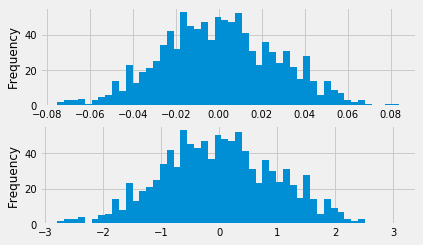

In [7]:
fig, ax = plt.subplots(nrows=2)
tmp = teams['efg'] - teams['opp_efg']
tmp.plot.hist(ax=ax[0], bins=50)
teams['eFG'].plot.hist(ax=ax[1], bins=50)

print(f"""
Compare Std Deviations for eFG:
Original: {np.std(tmp):.03f}
Z-Scored: {np.std(teams['eFG']):.03f}
""")

### The Four Factor Model

Dean Oliver's weights of importance were 40\% for shooting (effective field goal percentage), 25% for turnovers (turnover rate), 20% for rebounding (offensive rebounding rate), and 15% for free throws (free throw rate).

Since our factors are all on the same scale, we can combine them using Dean Oliver's weighting to build a composite model (we negative the Tov factor since turnovers are obviously bad unless filled with apples).

In [8]:
teams['Four Factors'] = .4 * teams['eFG'] - .25 * teams['Tov'] + \
    .20 * teams['Reb'] + .15 * teams['Ftr']

### The Four Factor Model and Winning

We can take a look at how the four factor model at a team-season level relates to team winning percentage and offensive and defensive ratings.  The result is pretty clear, the four factor model has a strong relation with performance and winning.

In [9]:
teams['win_pct'] = teams['wins'] / (teams['wins'] + teams['losses'])

Recall from the empirical analysis of Pythagorean Expectation we looked at,
$$
    \text{Performance Ratio} = \frac{\text{Off Rating}}{\text{Def Rating}}.
$$

Since this is the input into the Pythagorean Expectation formula, we're going to look at the four factor model relates to the performance ratio.  Similar results will hold with Net Rating as well.

In [10]:
teams['pr'] = teams['off_rtg'] / teams['def_rtg']
teams['log_pr'] = np.log(teams['pr'])

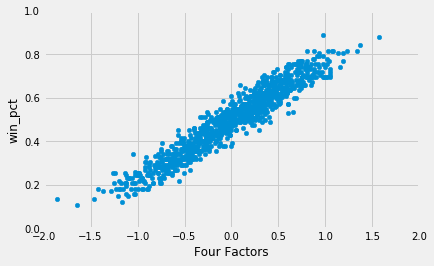

In [11]:
fig, ax = plt.subplots()
teams.plot.scatter('Four Factors', 'win_pct', ax=ax)
ax.set_ylim(0, 1)
ax.set_xlim(-2, 2);

Recall from Pythagorean Expectation how net rating and winning percentage are linked in a non-linear manner.  The driver of winning is a positive net rating and the four factor model creates an effective model of net rating.

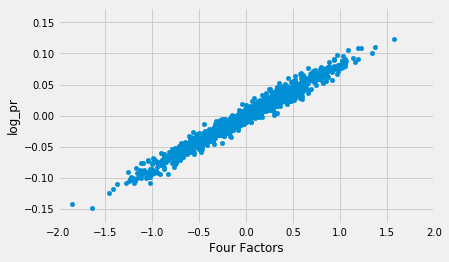

In [12]:
fig, ax = plt.subplots()
teams.plot.scatter('Four Factors', 'log_pr', ax=ax)
ax.set_ylim(-0.175, 0.175)
ax.set_xlim(-2, 2);

#### Do all four factors actually matter?

Just because the four factor model works, why should the individual components matter?  We could have just added in junk instead of provided an effective deconstruction of net rating into four factors.

##### Factor Correlations

In [13]:
df = teams[['win_pct', 'log_pr', 'eFG', 'Tov', 'Reb', 'Ftr', 'Four Factors']]
df.corr()

,win_pct,log_pr,eFG,Tov,Reb,Ftr,Four Factors
win_pct,1.00,0.97,0.85,-0.27,0.28,0.40,0.96
log_pr,0.97,1.00,0.86,-0.29,0.31,0.39,0.98
eFG,0.85,0.86,1.00,0.07,0.06,0.30,0.81
Tov,-0.27,-0.29,0.07,1.00,0.04,0.23,-0.33
Reb,0.28,0.31,0.06,0.04,1.00,0.03,0.40
Ftr,0.40,0.39,0.30,0.23,0.03,1.00,0.40
Four Factors,0.96,0.98,0.81,-0.33,0.40,0.40,1.00


##### Factor Scatter Matrix Plot

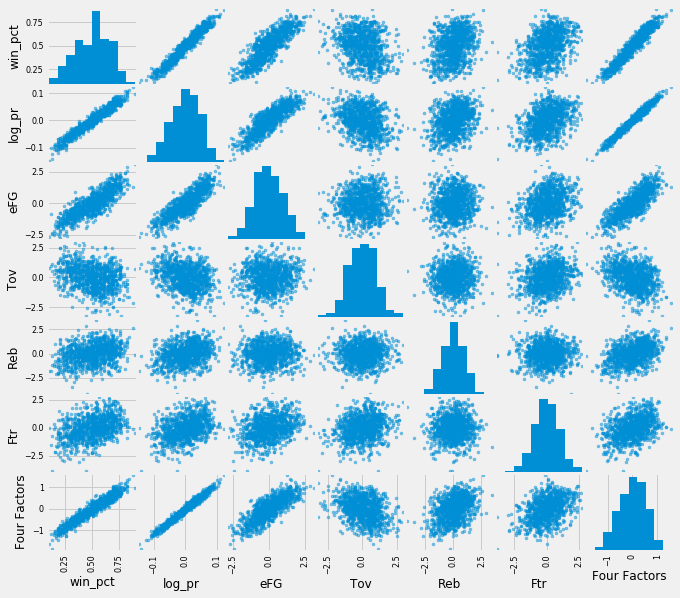

In [14]:
scatter_matrix(df, figsize=(10, 10));

##### Linear Fit

Since the four factor model produces an output that is a rather meaningless value, we should use a linear fit between net rating and the four factor model to find a scaling that will give a good estimate of net rating.

If the four factor model completely captures everything about basketball and team performance, then the errors from the linear fit should contain not further information about team performance, i.e. the errors should be uncorrelated with net rating.

Computed Linear Fit:
xLogPR = 0.083 * FourFactorModel


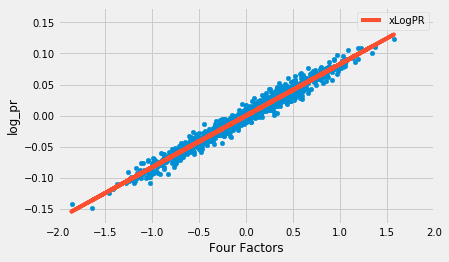

In [15]:
params, predictions, errors = linear_fit(
    teams['Four Factors'], teams['log_pr'], constant=False)

beta = params['Four Factors']
print("Computed Linear Fit:")
print("====================")
s = f"xLogPR = {beta:.3f} * FourFactorModel"
print(s)

fig, ax = plt.subplots()
teams.plot.scatter('Four Factors', 'log_pr', ax=ax)

teams['xLogPR'] = predictions
ax.plot(teams['Four Factors'], predictions, color='C1', label='xLogPR')

ax.legend()
ax.set_ylim(-0.175, 0.175)
ax.set_xlim(-2, 2);

The residual errors from the predictions of the four factor model may have a faint signal lingering (the correlation is not particularly strong and may be just noise).

However, note this:
+ The correlation between the four factor model and the log performance ratio is 0.98 
+ The magnitude of the errors are $\sim \pm 0.005$

If there is any remaining feature of basketball that hasn't been captured, it's not that important.  And slightly different weightings could capture it.  (many people, yours truly included, think the weighting on shooting should be higher).


Correlation of errors and log PR: 0.174



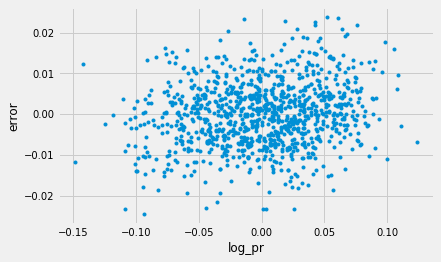

In [16]:
corr = correlation(errors, teams['log_pr'])
print(f"""
Correlation of errors and log PR: {corr:.03f}
""")
fig, ax = plt.subplots()
ax.plot(teams['log_pr'], errors, '.')
ax.set_xlabel('log_pr')
ax.set_ylabel('error');

### Team-Season Conclusion

It turns out that the factors do all matter.  As set forth by Dean Oliver, efficient shooting from the floor is the most important factor and explains the most about team performance.  Also it appears the factors are not redundant since the correlations between the factors is not strong.  The only factor that has redundancy appears to be the Free Throw Rate (and this redundancy likely drives it's correlation with winning percentage).

Also, the four factor model does a good job of capturing a lot of the information with respect to team performance.  Different weightings could be proposed but they are unlikely to yield huge improvements.

It should also be noted that one could use Net Rating instead of the log Performance Ratio (even though PR makes more sense due to Pythagorean Expectation) but the results will be pretty similar.

## Game Level 2016-17

At the team-season level, the four factors were shown to provide a strong predictor for winning percentage.  We can also view how the factors associate with performance at the game level, specifically with respect to point differential.

### Setup

The NBA Stats website publishes the underlying factor components for each game for both teams.  The dataset was gathered using the package `nba_py` which allows for extracting data from the NBA Stats site.

Each row represents a game from the perspective of the away team (the opponent team is the home team).  The original data had the computed values for each team for each game but only one team is needed since the other values are redundant.

In [17]:
games = pd.read_csv('four_factor_game_data.csv')
games.head()

,GAME_ID,TEAM_ID,TEAM_NAME,TEAM_ABBREVIATION,TEAM_CITY,MIN,EFG_PCT,FTA_RATE,TOV_PCT,OREB_PCT,...,DEF_RATING,NET_RATING,OPP_TEAM_ID,OPP_TEAM_NAME,OPP_TEAM_ABBREVIATION,OPP_TEAM_CITY,OPP_OFF_RATING,OPP_DEF_RATING,OPP_NET_RATING,PTS_DIFF
0,21600001,1610612752,Knicks,NYK,New York,240:00,0.42,0.23,0.18,0.24,...,110.0,-22.7,1610612739,Cavaliers,CLE,Cleveland,110.0,87.3,22.7,-29.0
1,21600002,1610612762,Jazz,UTA,Utah,240:00,0.54,0.20,0.14,0.17,...,121.9,-14.8,1610612757,Trail Blazers,POR,Portland,121.9,107.2,14.8,-9.0
2,21600003,1610612759,Spurs,SAS,San Antonio,240:00,0.54,0.27,0.14,0.44,...,99.1,26.8,1610612744,Warriors,GSW,Golden State,99.1,125.9,-26.8,29.0
3,21600004,1610612753,Magic,ORL,Orlando,240:00,0.42,0.32,0.11,0.29,...,108.0,-9.3,1610612748,Heat,MIA,Miami,108.0,98.6,9.3,-12.0
4,21600005,1610612754,Pacers,IND,Indiana,265:00,0.56,0.37,0.14,0.17,...,103.5,8.6,1610612742,Mavericks,DAL,Dallas,103.5,112.1,-8.6,9.0


### Four Factor Model

For the game level data, we compute the four factor model again.

#### Compute the Factors

Once again, we compute differences between the underlying components and use Z-Scores to put the factors on the same scale.

In [18]:
games['eFG'] = zscore(games['EFG_PCT'] - games['OPP_EFG_PCT'])
games['Tov'] = zscore(games['TOV_PCT'] - games['OPP_TOV_PCT'])
games['Reb'] = zscore(games['OREB_PCT'] - games['OPP_OREB_PCT'])
games['Ftr'] = zscore(games['FTA_RATE'] - games['OPP_FTA_RATE'])

#### Build the Model

In [19]:
games['Four Factors'] = .4 * games['eFG'] - .25 * games['Tov'] + \
    .20 * games['Reb'] + .15 * games['Ftr']

### Four Factor Model and Game Performance

As we did with the season level data, we look at the performance ratio for a game using offensive and defensive ratings to see how the four factor model relates. Using offensive and defensive ratings is better than raw point differential since we can account for varying pace/number of possessions in the game.

In [20]:
games['LOG_PR'] = np.log(games['OFF_RATING'] / games['DEF_RATING'])

Since we are looking at game level data, the variation in log performance ratio will naturally be a lot larger than the season level data.  Some games will be blowouts, hence the large values, but over a season the performance will average out.

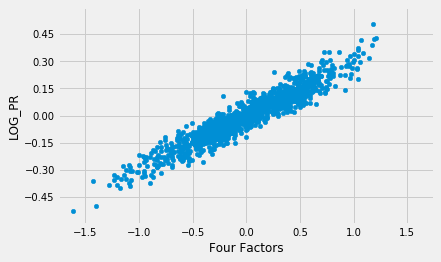

In [21]:
fig, ax = plt.subplots()
games.plot.scatter('Four Factors', 'LOG_PR', ax=ax)
ax.set_ylim(-0.6, 0.6)
ax.set_xlim(-1.75, 1.75)
ax.set_yticks(np.arange(-.45, .46, .15))
ax.set_xticks(np.arange(-1.5, 1.6, .5));

#### Factor Correlations

In [22]:
df = games[['LOG_PR', 'eFG', 'Tov', 'Reb', 'Ftr', 'Four Factors']]
df.corr()

,LOG_PR,eFG,Tov,Reb,Ftr,Four Factors
LOG_PR,1.00,0.83,-0.19,0.17,0.14,0.95
eFG,0.83,1.00,0.17,-0.13,0.03,0.74
Tov,-0.19,0.17,1.00,0.16,0.10,-0.30
Reb,0.17,-0.13,0.16,1.00,-0.03,0.23
Ftr,0.14,0.03,0.10,-0.03,1.00,0.28
Four Factors,0.95,0.74,-0.30,0.23,0.28,1.00


#### Factor Scatter Matrix Plot

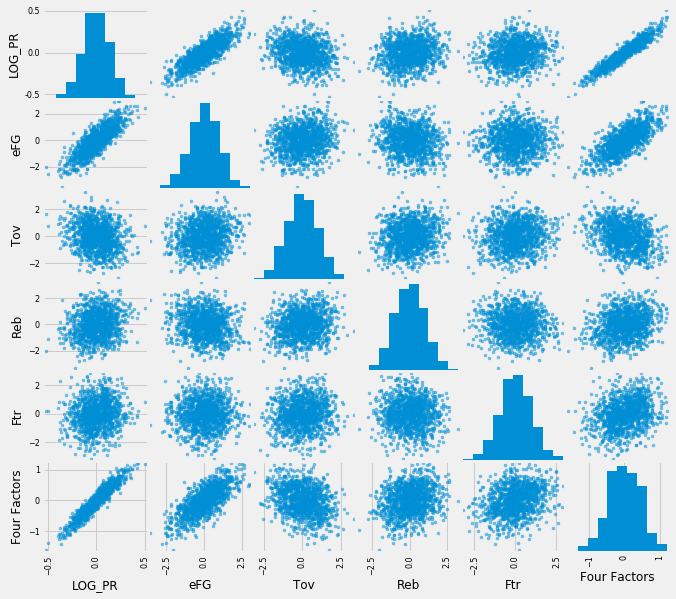

In [23]:
scatter_matrix(df, figsize=(10, 10));

##### Linear Fit

As with the season level data, we can analyze the linear fit of the four factor model and the log performance ratio.

Computed Linear Fit:
xLogPR = 0.295 * FourFactorModel


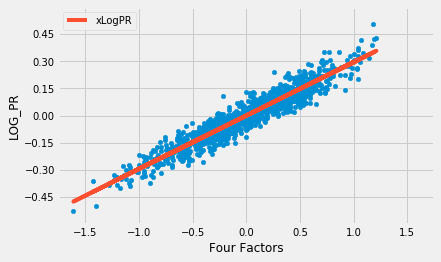

In [24]:
params, predictions, errors = linear_fit(
    games['Four Factors'], games['LOG_PR'], constant=False)

beta = params['Four Factors']
print("Computed Linear Fit:")
print("====================")
s = f"xLogPR = {beta:.3f} * FourFactorModel"
print(s)

fig, ax = plt.subplots()
games.plot.scatter('Four Factors', 'LOG_PR', ax=ax)

games['xLogPR'] = predictions
ax.plot(games['Four Factors'], predictions, color='C1', label='xLogPR')

ax.legend()
ax.set_ylim(-0.6, 0.6)
ax.set_xlim(-1.75, 1.75)
ax.set_yticks(np.arange(-.45, .46, .15))
ax.set_xticks(np.arange(-1.5, 1.6, .5));

This time when we look at the errors, the evidence more strongly suggests the four factor model may not be capturing everything.


Correlation of errors and log PR: 0.312



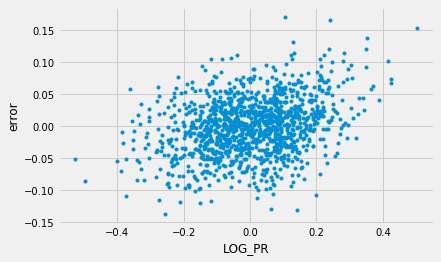

In [25]:
corr = correlation(errors, games['LOG_PR'])
print(f"""
Correlation of errors and log PR: {corr:.03f}
""")
fig, ax = plt.subplots()
ax.plot(games['LOG_PR'], errors, '.')
ax.set_xlabel('LOG_PR')
ax.set_ylabel('error');

### Game Level Conclusion

The four factor model works well again at the game level but it appears that there may be 
some issues to work out.

Possible reasons that as data scientists we would have to explore are:
+ The factors are good but Dean Oliver's weightings are suboptimal
+ Blowouts are inducing some kind of effect/bias in the data and we are observing the artifacts of that (does it appear as though the worst performance of the model comes at the high and low ends, ie. blowouts?)
+ We are missing factors and need to better model the game

It should be pointed out that the previous analyses could be performed using Net Rating instead.  The results will still be similar: there are still some issues to work out.